In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
data = pd.read_csv('stud_math.xls')
import warnings
warnings.filterwarnings("ignore") #get_stat_diff functions causes several warnings during execution

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [44]:
data.columns #renaming the column for the furhter comfort usage
data.rename(columns = {'Pstatus':'pstatus', 'Medu':'medu','Fedu':'fedu', 'Fjob':'fjob', 'Mjob':'mjob',
                      }, inplace = True)
#deleting column "studytime, granular" since no decription for it was provided
data.drop(['studytime, granular'],axis = 1, inplace = True)

In [45]:
# stated below function returns the quantity if missing values in all the dataframe columns:
def missing_values(dataframe):
    print('number of empty cells in columns:')
    for column in dataframe:
            empty = len(dataframe[column]) - dataframe[column].value_counts().sum()
            print( dataframe[column].name,'=', empty)

In [46]:
missing_values(data)
# the researched dataframe has missing values in most of the columns
# fully filled-in columns are only: 'school', 'sex' and 'age'. The the others got unfilled cells.

number of empty cells in columns:
school = 0
sex = 0
age = 0
address = 17
famsize = 27
pstatus = 45
medu = 3
fedu = 24
mjob = 19
fjob = 36
reason = 17
guardian = 31
traveltime = 28
studytime = 7
failures = 22
schoolsup = 9
famsup = 39
paid = 40
activities = 14
nursery = 16
higher = 20
internet = 34
romantic = 31
famrel = 27
freetime = 11
goout = 8
health = 15
absences = 12
score = 6


In [47]:
# The below stated fuction passes throuhg the dataframe and returns distribution of values in object columns,
# the quantity of missing cells and the quantity of unique values
def nominative_percentage(dataframe):
    for column in dataframe:
        if dataframe[column].dtypes == 'object': #passing through the object columns
            empty = len(dataframe[column]) - dataframe[column].value_counts().sum()
            distribution = dataframe[column].value_counts()/len(dataframe[column])
            unique = dataframe[column].nunique()
            print('\n', dataframe[column].name,'\n', "empty cells quantity = ", empty,'\n', "unique values quantity = ", unique,'\n', round(distribution,2), sep='')
        else:
            continue

In [48]:
nominative_percentage(data)
# provided analysis lets us make some conclusions:
    # the sampling has almost equal sex distribution;
    # bigger part of students live in full families and a student is not the only child;
    # 75% of students live in the cities;
    # close to equal distribution between students visiting and non-visiting any additional acitivities;
    # most of students have some additional study support (~85%);
    # more than 30% of students have romantic relations;
    # 51% of students got the additional paid math courses;
    # 90% of students wish to join a high school;


school
empty cells quantity = 0
unique values quantity = 2
GP    0.88
MS    0.12
Name: school, dtype: float64

sex
empty cells quantity = 0
unique values quantity = 2
F    0.53
M    0.47
Name: sex, dtype: float64

address
empty cells quantity = 17
unique values quantity = 2
U    0.75
R    0.21
Name: address, dtype: float64

famsize
empty cells quantity = 27
unique values quantity = 2
GT3    0.66
LE3    0.27
Name: famsize, dtype: float64

pstatus
empty cells quantity = 45
unique values quantity = 2
T    0.79
A    0.09
Name: pstatus, dtype: float64

mjob
empty cells quantity = 19
unique values quantity = 5
other       0.34
services    0.25
at_home     0.15
teacher     0.14
health      0.08
Name: mjob, dtype: float64

fjob
empty cells quantity = 36
unique values quantity = 5
other       0.50
services    0.26
teacher     0.07
at_home     0.04
health      0.04
Name: fjob, dtype: float64

reason
empty cells quantity = 17
unique values quantity = 4
course        0.35
home          0.26
reput

In [49]:
# The below stated fuction passes throuhg the dataframe and returns histogramms of float64 and int64 columns 
def non_nominative(dataframe):
    for column in dataframe:
        if dataframe[column].dtypes == 'object':
            continue
        else:
            dataframe[column].plot(kind = 'hist', title = dataframe[column].name)
            plt.show()

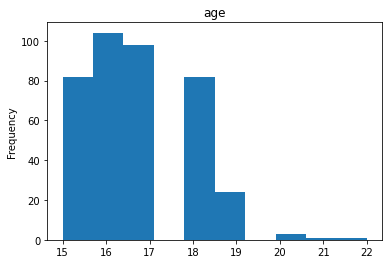

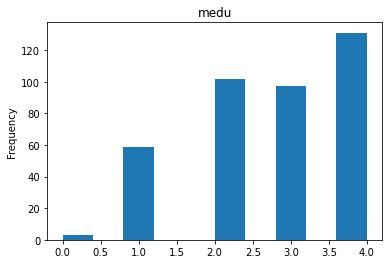

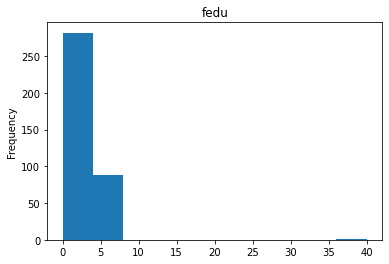

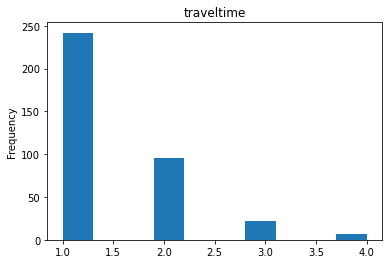

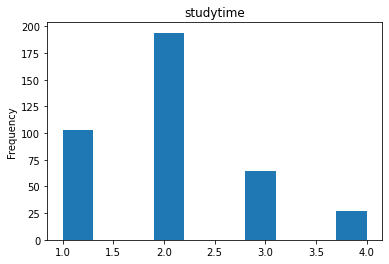

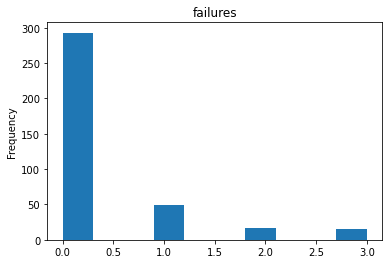

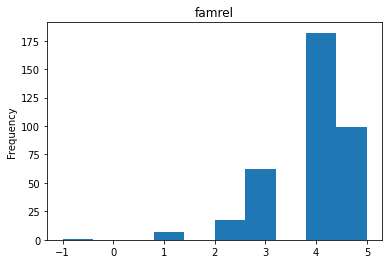

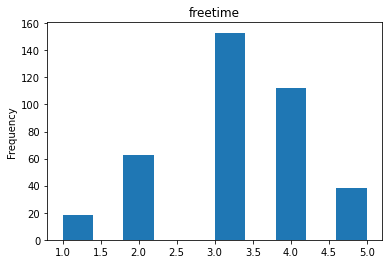

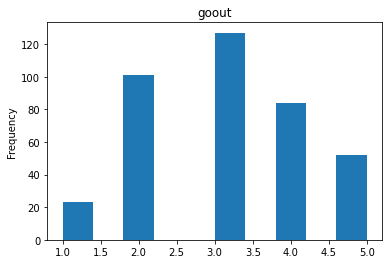

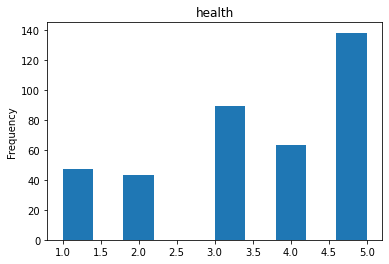

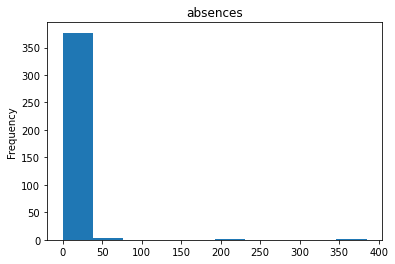

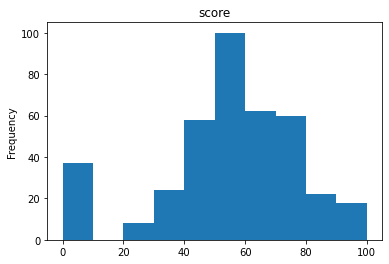

In [50]:
non_nominative(data)

In [51]:
# checking for the outliers in 'age'column:
median = data.age.median()
IQR = data.age.quantile(0.75) - data.age.quantile(0.25)
perc25 = data.age.quantile(0.25)
perc75 = data.age.quantile(0.75)
print('25-й percentile: {},'.format(perc25), '75-й percentile: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Outliers range: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й percentile: 16.0, 75-й percentile: 18.0, IQR: 2.0,  Outliers range: [13.0, 21.0].


In [52]:
# 'age' column has outliers.no fixing required since outliers might carry useful information for the model
data.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [53]:
# without deeper analysis an outlier in "fedu" columns spotted. Probably, it is a misprint
data.fedu = data.fedu.apply(lambda x: 4.0 if x == 40 else x) # fixing
# "famrel" column also has a misprint, no negative values allowed
data.famrel = data.famrel.apply(lambda x: 1.0 if x == -1 else x) # fixing

In [54]:
# checking for the outliers in 'absences'column:
median = data.absences.median()
IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)
print('25-й percentile: {},'.format(perc25), '75-й percentile: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Outliers range: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й percentile: 0.0, 75-й percentile: 8.0, IQR: 8.0,  Outliers range: [-12.0, 20.0].


In [55]:
# replacing outliers with mean:
data.absences = data.absences.apply(lambda x: data.absences.mean() if x >20 else x)

In [56]:
# checking for the outliers in 'score'column:
median = data.score.median()
IQR = data.score.quantile(0.75) - data.score.quantile(0.25)
perc25 = data.score.quantile(0.25)
perc75 = data.score.quantile(0.75)
print('25-й percentile: {},'.format(perc25), '75-й percentile: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Outliers range: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й percentile: 40.0, 75-й percentile: 70.0, IQR: 30.0,  Outliers range: [-5.0, 115.0].


In [ ]:
# 'score' column is normally distributed and has no outliers

In [57]:
# performing correlation analysis to research the columns correlated with 'Score'
data.corr()
# observing the strongest negative correlation with "failures" column and 
# negative correlation with 'age', elder students tend to get higher score probably due to increasing experience
# negative correlation with 'goout', logically students tend to replace study time with walks with friends
# positive correlation with 'medu'

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.067415,0.029023,0.135107,-0.065946,0.159720,-0.155726
medu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.014459,0.025335,0.064164,-0.045051,0.073651,0.213349
fedu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.026122,-0.025892,0.042663,0.023862,-0.011385,0.130923
traveltime,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,-0.021542,-0.021937,0.037636,-0.021531,-0.046261,-0.070559
studytime,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,0.039555,-0.121969,-0.051280,-0.080016,-0.081388,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,-0.009110,0.098382,0.120914,0.081284,0.088183,-0.344338
famrel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,1.000000,0.172751,0.077167,0.086309,-0.092044,0.055305
freetime,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.172751,1.000000,0.296437,0.061575,0.075162,0.019026
goout,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.077167,0.296437,1.000000,-0.015608,0.107168,-0.129685
health,-0.065946,-0.045051,0.023862,-0.021531,-0.080016,0.081284,0.086309,0.061575,-0.015608,1.000000,-0.020292,-0.070460


In [63]:
# stated fuction performs the t-test for the 'score' column:
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
                <= 0.05/len(combinations_all):  # Bonferoni amendment counted
            print('found statistically significant differencies for the column', column)
            break

In [66]:
data_cat = ['school', 'sex', 'address', 'famsize', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian',
           'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup','paid', 'famrel', 'freetime',
            'activities', 'nursery', 'higher', 'internet', 'goout', 'health', 'romantic']
for col in data_cat:
               get_stat_dif(col)

found statistically significant differencies for the column address
found statistically significant differencies for the column medu
found statistically significant differencies for the column mjob
found statistically significant differencies for the column failures
found statistically significant differencies for the column higher
found statistically significant differencies for the column goout
found statistically significant differencies for the column romantic


In [ ]:
# visualising boxplots for the the previous stage selected columns

In [61]:
# function to set the boxplots:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

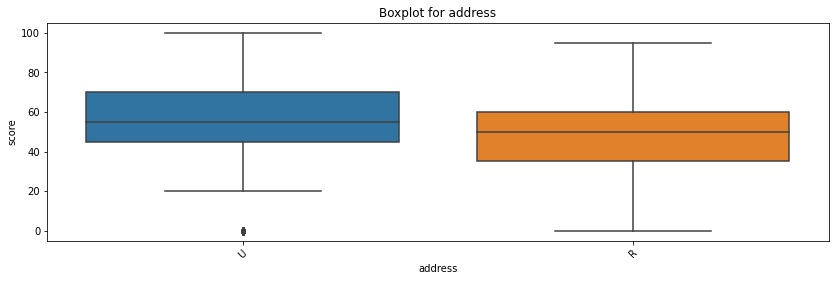

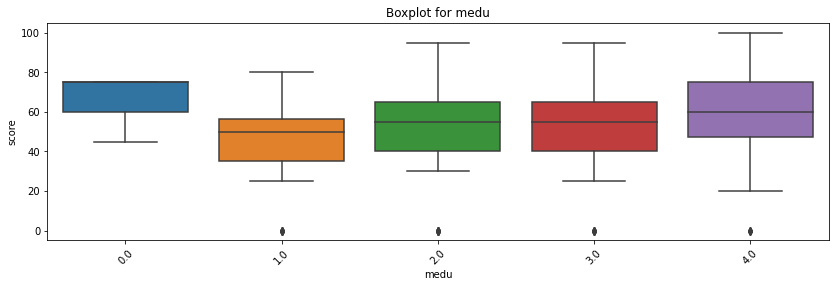

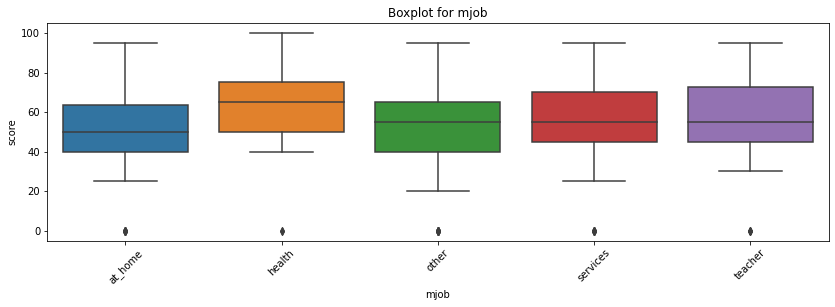

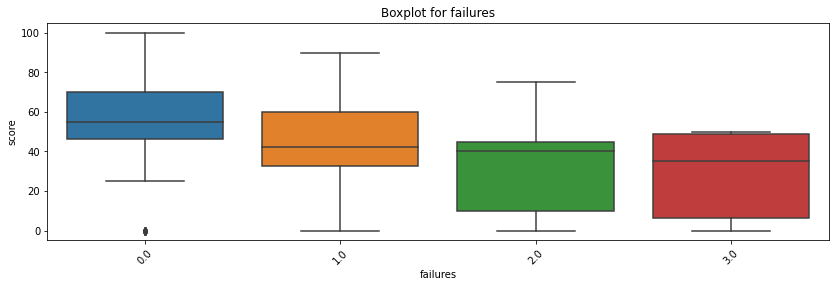

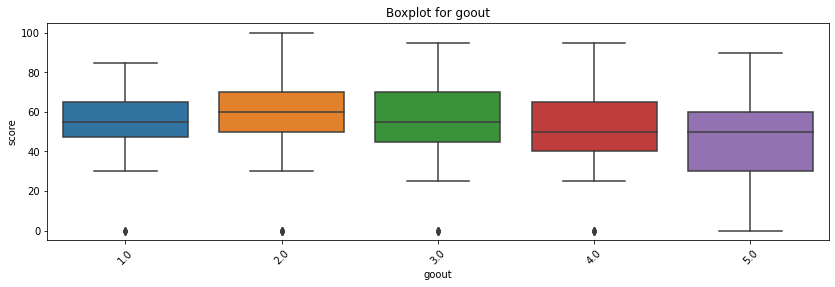

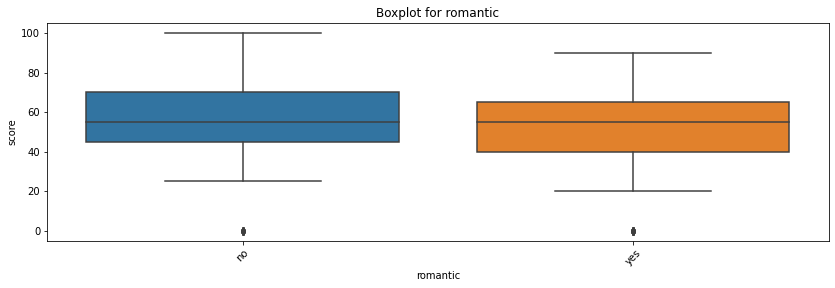

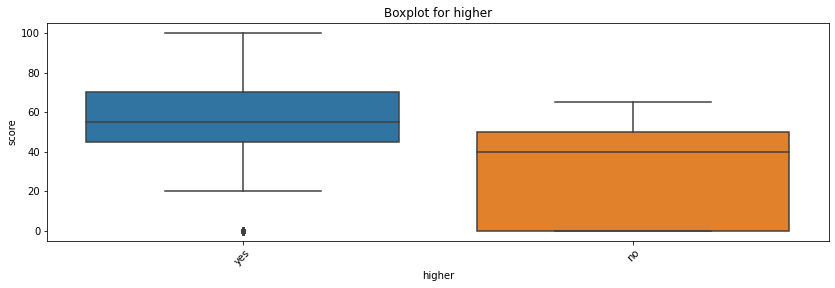

In [62]:
for col in ['address', 'medu', 'mjob','failures',  'goout', 'romantic', 'higher' ]:
    get_boxplot(col)

In [ ]:
# The boxplots additionally confirm the results of the T-test.
# So, for the further model those 7 selected columns are recommended to be left in a dataset for the further modelling.

In [ ]:
# according to the set boxplots the below conclusions can be made:

# students living in the cities got better scores. Their minimum score is much higher.
# dependence betweeb the quality of mothers education and score. Better mothers educations causes better score of a student.
# Students who's mothers are occupied in a healthcare got higher scores.
# The strongest negative correlation between score and number of non-study failures. Students those previously succeeded tend to
# have the highest scores. Anyway, this correlations seems to need an addtitonal research.
# The worse scores got the students those got either little amount of walks or too lot of them. 
# So, recapitulating - children should walk, but not spending all their free time for that.
# Students with no romantic relations tend to have higher score. Probably, because spent this time for study.
# Students wishing to join a high school got much higher scores. Huge gap between the average and maximum results.
# Logic seems to be quite simple, students with no intention to join a university pay no attention to preparing for the tests.


In [ ]:
# my comments for the mentor:
 # I was trying hard not to miss anything according the set up list of the necessary to be done things in the project.
 # Nevertheless, I got a feeling that might have misundertood something or missed something critical due to haste since
 # was catching up the flow since August vacation.
 # Also, probably an important thing - I didnt drop the columns those not to be taken to further modelling, not being sure whether 
 # it is necessary of not.